In [52]:
import pandas as pd
import numpy as np

from time import time

# Import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
# from sklearn.inspection import plot_partial_dependence



# Import functions from own Python-File (see visuals_script.py in Repo)
#import visuals_script as vs

# Pretty display for notebooks
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
RSEED=42

# coffee data
#url="https://github.com/jldbc/coffee-quality-database/raw/master/data/robusta_data_cleaned.csv"
#coffee_features=pd.read_csv(url)

# coffe score

#url="https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_ratings_raw.csv"
#coffee_quality=pd.read_csv(url)

In [3]:
df = pd.read_csv('data/Train.csv')

In [5]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fracti

In [12]:
pd.set_option('display.max_rows',None)
print(df.dtypes)
pd.set_option('display.max_rows',10)

Place_ID X Date                                         object
Date                                                    object
Place_ID                                                object
target                                                 float64
target_min                                             float64
target_max                                             float64
target_variance                                        float64
target_count                                             int64
precipitable_water_entire_atmosphere                   float64
relative_humidity_2m_above_ground                      float64
specific_humidity_2m_above_ground                      float64
temperature_2m_above_ground                            float64
u_component_of_wind_10m_above_ground                   float64
v_component_of_wind_10m_above_ground                   float64
L3_NO2_NO2_column_number_density                       float64
L3_NO2_NO2_slant_column_number_density                 

In [8]:
df.shape

(30557, 82)

In [10]:
pd.set_option('display.max_rows',None)
print(df.isna().sum())
pd.set_option('display.max_rows',10)

Place_ID X Date                                            0
Date                                                       0
Place_ID                                                   0
target                                                     0
target_min                                                 0
target_max                                                 0
target_variance                                            0
target_count                                               0
precipitable_water_entire_atmosphere                       0
relative_humidity_2m_above_ground                          0
specific_humidity_2m_above_ground                          0
temperature_2m_above_ground                                0
u_component_of_wind_10m_above_ground                       0
v_component_of_wind_10m_above_ground                       0
L3_NO2_NO2_column_number_density                        2189
L3_NO2_NO2_slant_column_number_density                  2189
L3_NO2_absorbing_aerosol

In [7]:
df.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [66]:
df.head()

,Place_ID X Date,Date,Place_ID,target,target_min,...,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,...,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,...,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,...,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,...,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,...,NaN,NaN,NaN,NaN,NaN


In [13]:
df.duplicated().value_counts()

False    30557
Name: count, dtype: int64

In [57]:
pd.set_option('display.max_rows', None)
print(df.nunique(axis=0))
pd.set_option('display.max_row',10)


Place_ID X Date                                        30557
Date                                                      94
Place_ID                                                 340
target                                                   375
target_min                                               269
target_max                                               721
target_variance                                        29621
target_count                                             863
precipitable_water_entire_atmosphere                   12633
relative_humidity_2m_above_ground                      11284
specific_humidity_2m_above_ground                      21396
temperature_2m_above_ground                            29462
u_component_of_wind_10m_above_ground                   28240
v_component_of_wind_10m_above_ground                   28274
L3_NO2_NO2_column_number_density                       25758
L3_NO2_NO2_slant_column_number_density                 25758
L3_NO2_absorbing_aerosol

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.dtypes

Place_ID X Date                         object
Date                            datetime64[ns]
Place_ID                                object
target                                 float64
target_min                             float64
                                     ...      
L3_CH4_aerosol_optical_depth           float64
L3_CH4_sensor_azimuth_angle            float64
L3_CH4_sensor_zenith_angle             float64
L3_CH4_solar_azimuth_angle             float64
L3_CH4_solar_zenith_angle              float64
Length: 82, dtype: object

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.corr(numeric_only=True).iloc[0].sort_values(ascending=False)

target                                                 1.000000
target_min                                             0.818803
target_max                                             0.630801
L3_CO_CO_column_number_density                         0.375737
L3_HCHO_tropospheric_HCHO_column_number_density        0.347125
L3_HCHO_HCHO_slant_column_number_density               0.320849
L3_NO2_NO2_slant_column_number_density                 0.315718
L3_NO2_NO2_column_number_density                       0.306772
L3_NO2_tropospheric_NO2_column_number_density          0.295380
target_variance                                        0.184818
L3_SO2_absorbing_aerosol_index                         0.152000
L3_CLOUD_cloud_top_pressure                            0.123855
L3_CLOUD_cloud_base_pressure                           0.097343
target_count                                           0.094135
L3_CH4_aerosol_optical_depth                           0.086445
L3_CH4_CH4_column_volume_mixing_ratio_dr

In [32]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_row',10)

<Axes: >

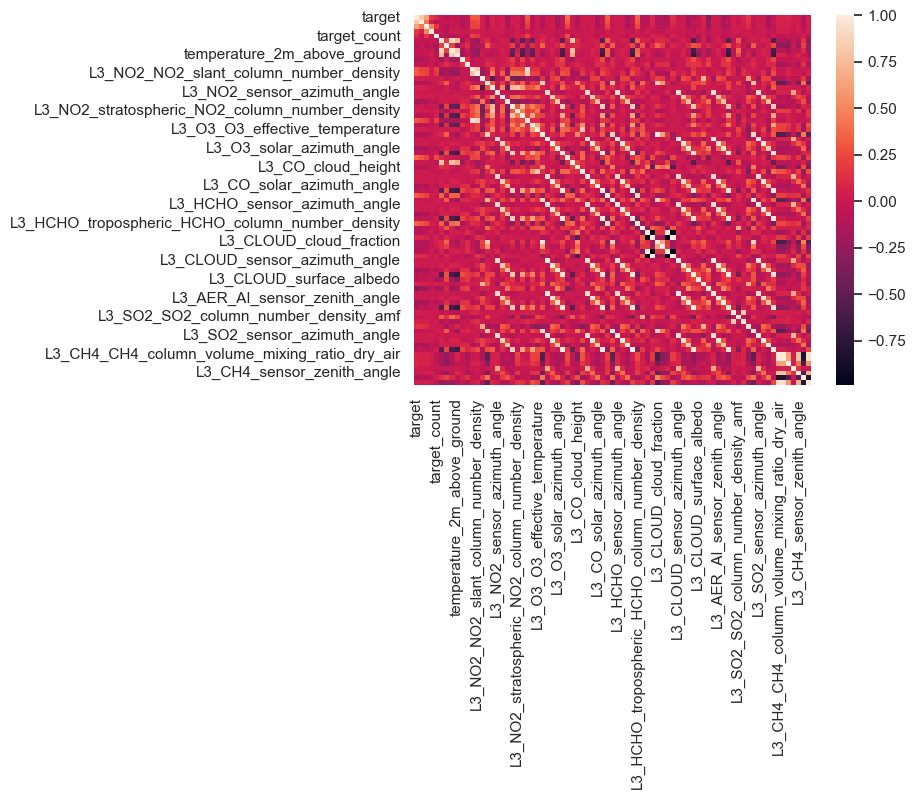

In [19]:
sns.heatmap(df.corr(numeric_only=True))

In [20]:
df.columns.to_list()

['Place_ID X Date',
 'Date',
 'Place_ID',
 'target',
 'target_min',
 'target_max',
 'target_variance',
 'target_count',
 'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CO_CO

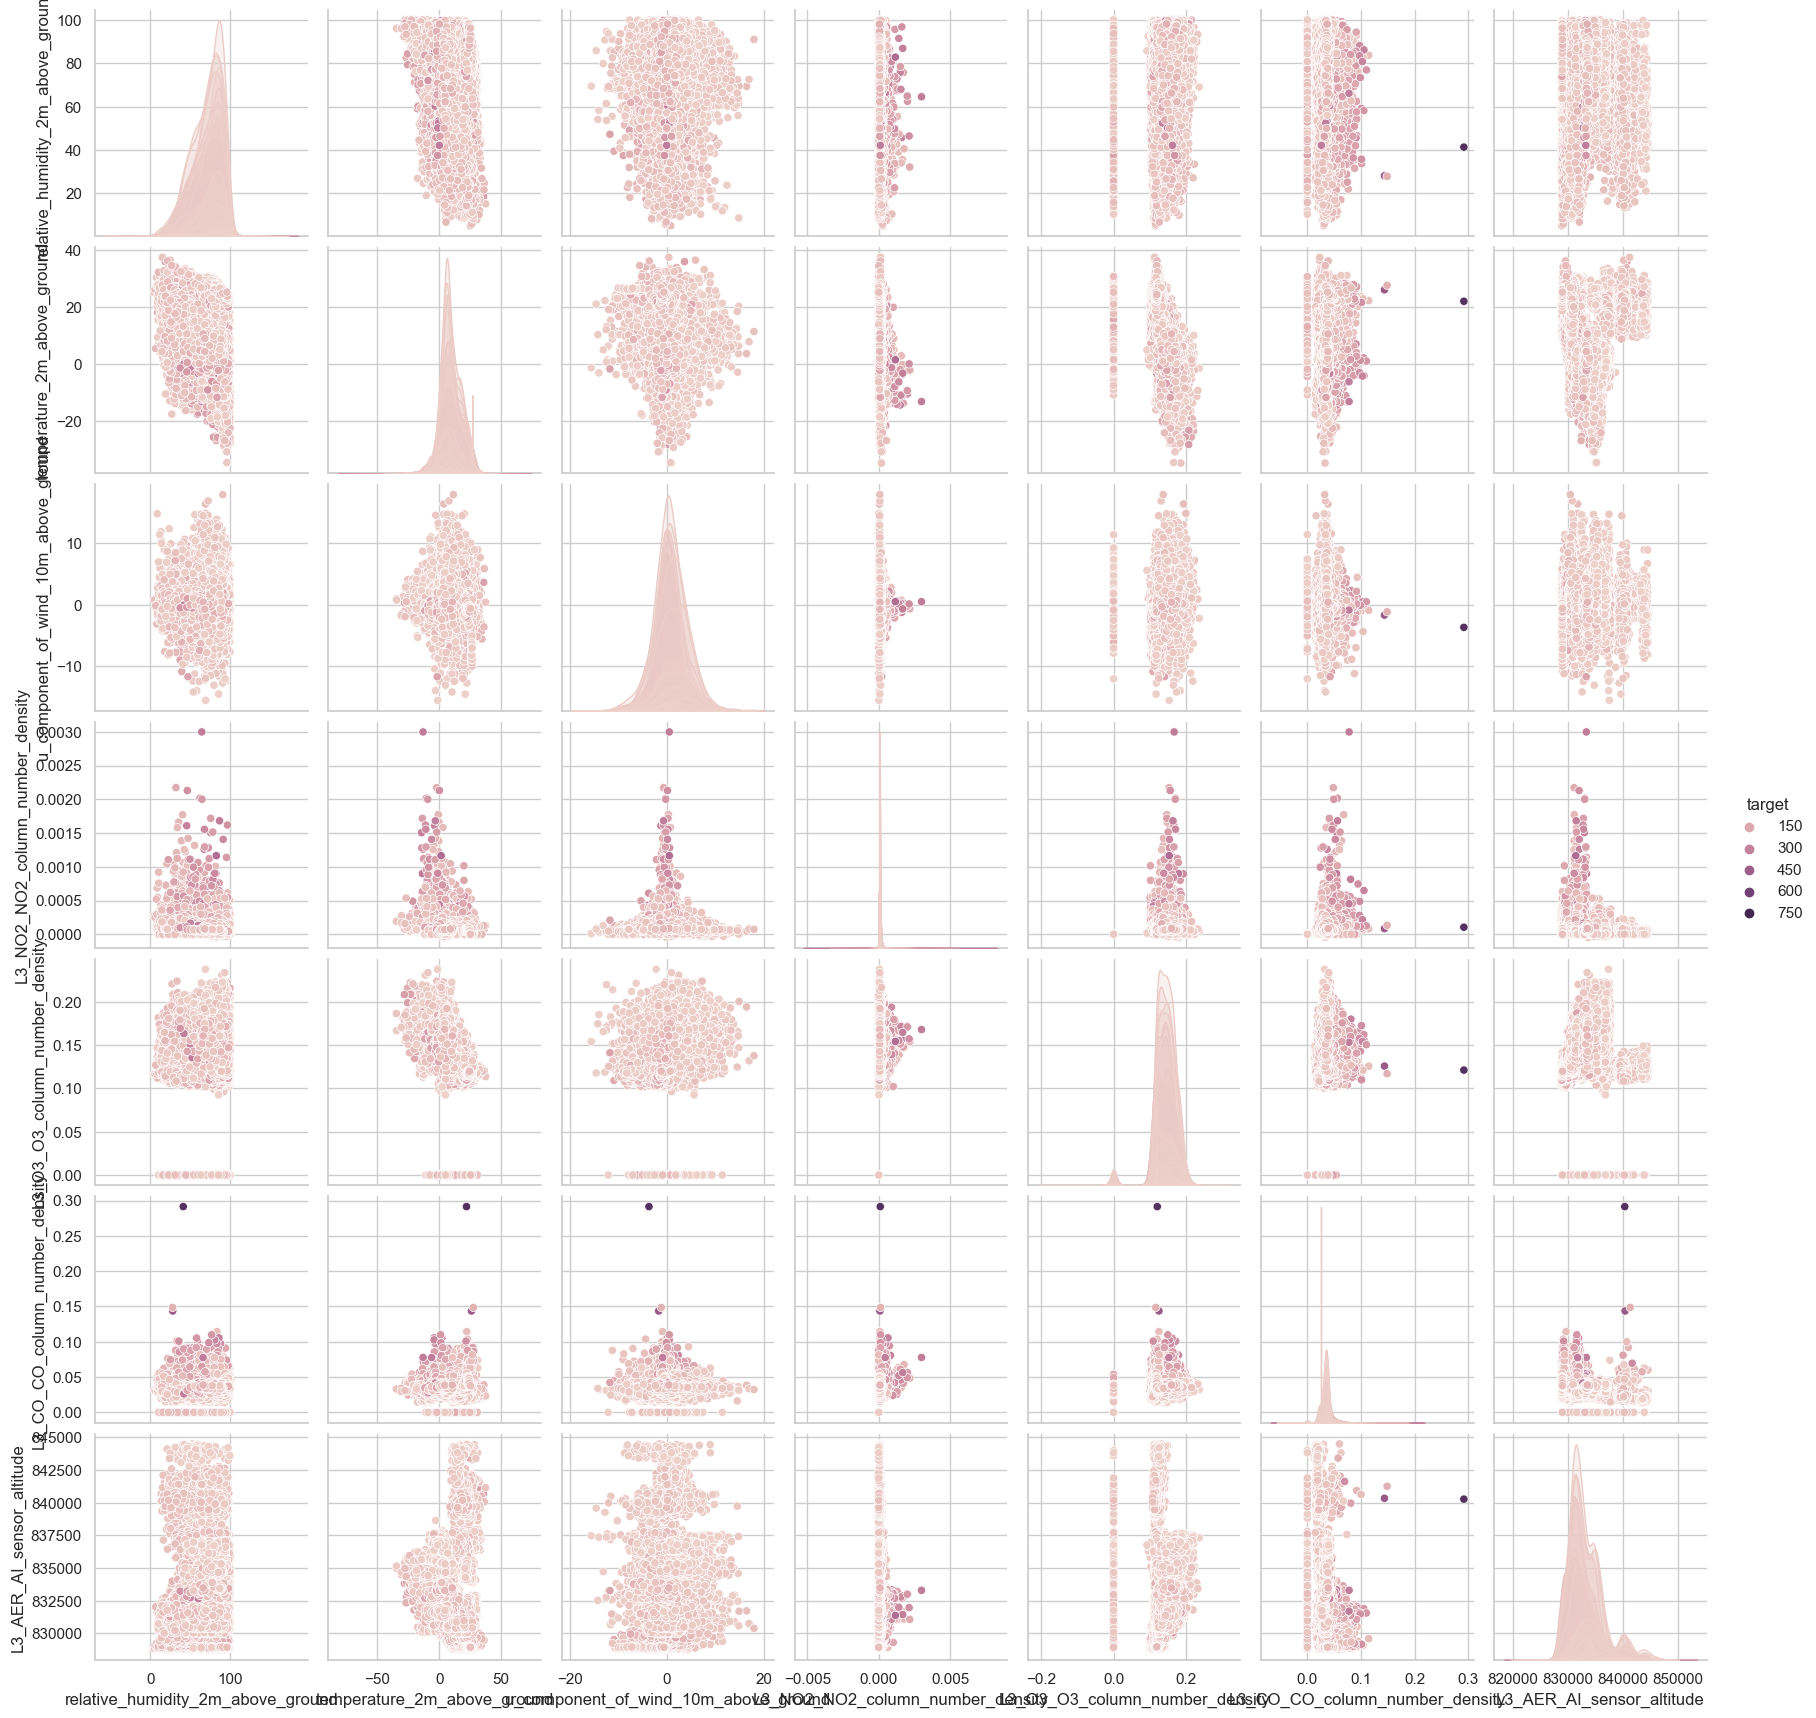

In [34]:
sns.pairplot(df[[#'Place_ID X Date',
 #'Date',
 #'Place_ID',
 'target',
 #'target_min',
 #'target_max',
 #'target_variance',
 #'target_count',
#  'precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
#  'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
#  'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
#  'L3_NO2_NO2_slant_column_number_density',
#  'L3_NO2_absorbing_aerosol_index',
#  'L3_NO2_cloud_fraction',
#  'L3_NO2_sensor_altitude',
#  'L3_NO2_sensor_azimuth_angle',
#  'L3_NO2_sensor_zenith_angle',
#  'L3_NO2_solar_azimuth_angle',
#  'L3_NO2_solar_zenith_angle',
#  'L3_NO2_stratospheric_NO2_column_number_density',
#  'L3_NO2_tropopause_pressure',
#  'L3_NO2_tropospheric_NO2_column_number_density',
  'L3_O3_O3_column_number_density',
#  'L3_O3_O3_effective_temperature',
#  'L3_O3_cloud_fraction',
#  'L3_O3_sensor_azimuth_angle',
#  'L3_O3_sensor_zenith_angle',
#  'L3_O3_solar_azimuth_angle',
#  'L3_O3_solar_zenith_angle',
  'L3_CO_CO_column_number_density',
#  'L3_CO_H2O_column_number_density',
#  'L3_CO_cloud_height',
#  'L3_CO_sensor_altitude',
#  'L3_CO_sensor_azimuth_angle',
#  'L3_CO_sensor_zenith_angle',
#  'L3_CO_solar_azimuth_angle',
#  'L3_CO_solar_zenith_angle',
#  'L3_HCHO_HCHO_slant_column_number_density',
#  'L3_HCHO_cloud_fraction',
#  'L3_HCHO_sensor_azimuth_angle',
#  'L3_HCHO_sensor_zenith_angle',
#  'L3_HCHO_solar_azimuth_angle',
#  'L3_HCHO_solar_zenith_angle',
#  'L3_HCHO_tropospheric_HCHO_column_number_density',
#  'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
#  'L3_CLOUD_cloud_base_height',
#  'L3_CLOUD_cloud_base_pressure',
#  'L3_CLOUD_cloud_fraction',
#  'L3_CLOUD_cloud_optical_depth',
#  'L3_CLOUD_cloud_top_height',
#  'L3_CLOUD_cloud_top_pressure',
#  'L3_CLOUD_sensor_azimuth_angle',
#  'L3_CLOUD_sensor_zenith_angle',
#  'L3_CLOUD_solar_azimuth_angle',
#  'L3_CLOUD_solar_zenith_angle',
#  'L3_CLOUD_surface_albedo',
#  'L3_AER_AI_absorbing_aerosol_index',
  'L3_AER_AI_sensor_altitude',
#  'L3_AER_AI_sensor_azimuth_angle',
#  'L3_AER_AI_sensor_zenith_angle',
#  'L3_AER_AI_solar_azimuth_angle',
#  'L3_AER_AI_solar_zenith_angle',
#  'L3_SO2_SO2_column_number_density',
#  'L3_SO2_SO2_column_number_density_amf',
#  'L3_SO2_SO2_slant_column_number_density',
#  'L3_SO2_absorbing_aerosol_index',
#  'L3_SO2_cloud_fraction',
#  'L3_SO2_sensor_azimuth_angle',
#  'L3_SO2_sensor_zenith_angle',
#  'L3_SO2_solar_azimuth_angle',
 #'L3_SO2_solar_zenith_angle',
 #'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
 #'L3_CH4_aerosol_height',
 #'L3_CH4_aerosol_optical_depth',
 #'L3_CH4_sensor_azimuth_angle',
 #'L3_CH4_sensor_zenith_angle',
 #'L3_CH4_solar_azimuth_angle',
 #'L3_CH4_solar_zenith_angle'
 ]], hue='target')

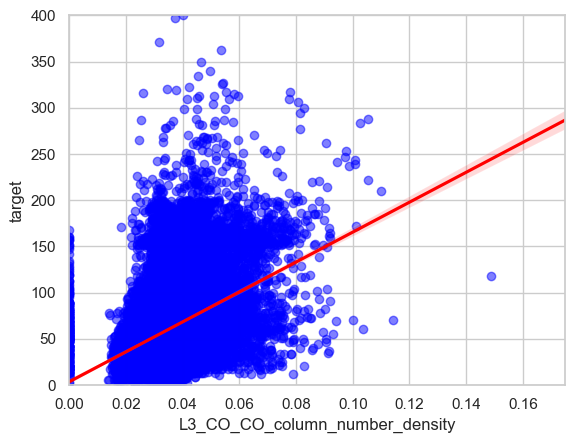

In [44]:
sns.regplot(df, x = 'L3_CO_CO_column_number_density', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )
plt.xlim(0, 0.175)
plt.ylim(0, 400)
plt.show()

<Axes: xlabel='u_component_of_wind_10m_above_ground', ylabel='target'>

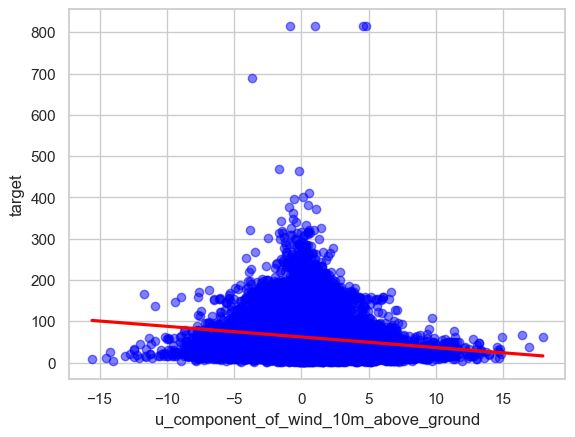

In [54]:
sns.regplot(df, x = 'u_component_of_wind_10m_above_ground', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )

In [ ]:
sns.regplot(df, x = '', y = 'target',
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"}
           )

In [73]:
df_absolutewind = df.copy()
df_absolutewind['u_component_of_wind_10m_above_ground'] = df['u_component_of_wind_10m_above_ground'].abs()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_absolutewind.corr(numeric_only=True).iloc[0].sort_values(ascending=False)


target                                                 1.000000
target_min                                             0.818803
target_max                                             0.630801
L3_CO_CO_column_number_density                         0.375737
L3_HCHO_tropospheric_HCHO_column_number_density        0.347125
L3_HCHO_HCHO_slant_column_number_density               0.320849
L3_NO2_NO2_slant_column_number_density                 0.315718
L3_NO2_NO2_column_number_density                       0.306772
L3_NO2_tropospheric_NO2_column_number_density          0.295380
target_variance                                        0.184818
L3_SO2_absorbing_aerosol_index                         0.152000
L3_CLOUD_cloud_top_pressure                            0.123855
L3_CLOUD_cloud_base_pressure                           0.097343
target_count                                           0.094135
L3_CH4_aerosol_optical_depth                           0.086445
L3_CH4_CH4_column_volume_mixing_ratio_dr

<Axes: xlabel='u_component_of_wind_10m_above_ground', ylabel='target'>

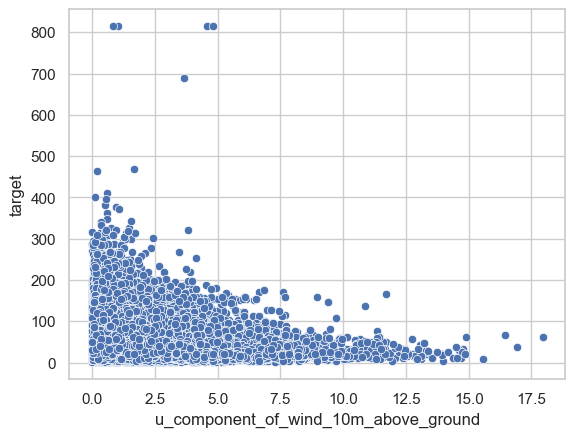

In [72]:
sns.scatterplot(df_absolutewind, x = 'u_component_of_wind_10m_above_ground', y = 'target',
            #scatter_kws = {"color": "blue", "alpha": 0.5},
            #line_kws = {"color": "red"}
           )

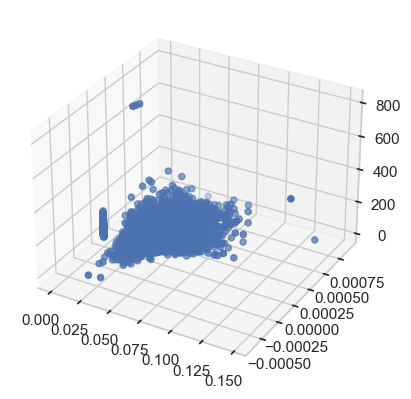

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['L3_CO_CO_column_number_density'], df['L3_HCHO_tropospheric_HCHO_column_number_density'], df['target'])
plt.show()

(0.0, 0.1)

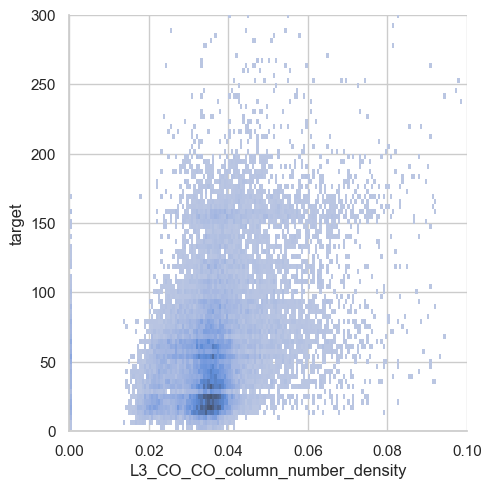

In [45]:
sns.displot(data=df,  x = 'L3_CO_CO_column_number_density', y = 'target', kind='hist')
plt.ylim(0, 300)
plt.xlim(0, 0.1)

highest number of points in range 0.03 to 0.04

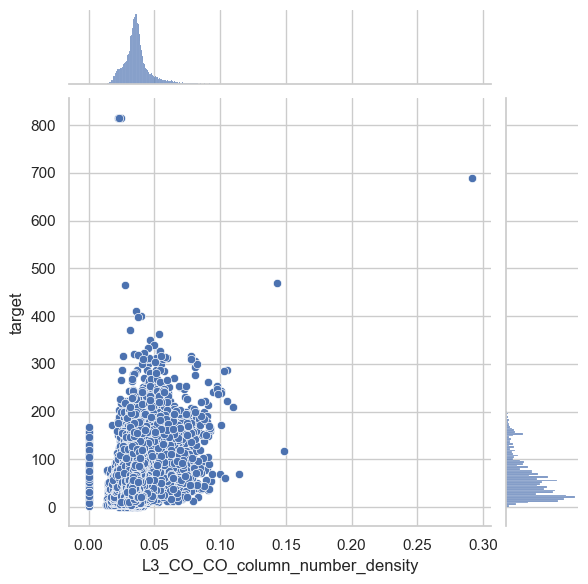

In [47]:
sns.jointplot(x = 'L3_CO_CO_column_number_density', y = 'target', data=df)

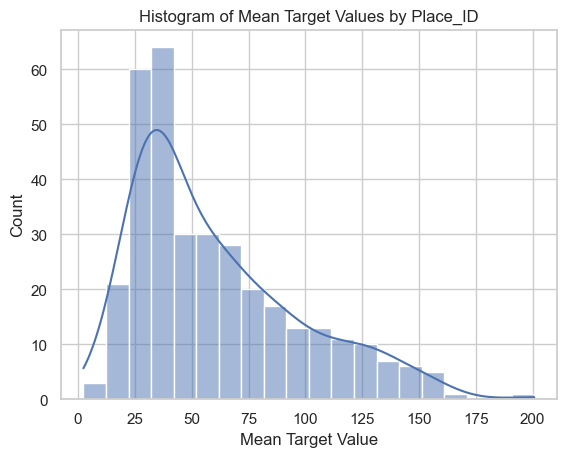

In [63]:
df_place = df.groupby('Place_ID')['target'].mean().reset_index()
sns.set(style="whitegrid")
sns.histplot(data=df_place, x='target', bins=20, kde=True)
plt.xlabel('Mean Target Value')
plt.ylabel('Count')
plt.title('Histogram of Mean Target Values by Place_ID')
plt.show()

<Axes: xlabel='Place_ID', ylabel='target'>

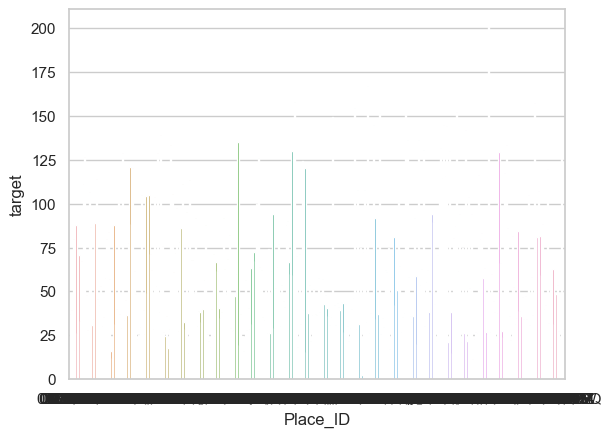

In [64]:
sns.barplot(data=df, x='Place_ID', y='target', ci=None)

remove target Outliers > 458


In [75]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers
outliers = find_outliers_IQR(df.select_dtypes('number'))
#print('number of outliers: '+ str(len(outliers)))
#print('max outlier value: '+ str(outliers.max()))
#print('min outlier value: '+ str(outliers.min()))
pd.set_option('display.max_rows',None)
print(outliers.count())
pd.set_option('display.max_rows',10)

target                                                 1201
target_min                                             1225
target_max                                             1184
target_variance                                        3081
target_count                                           2538
precipitable_water_entire_atmosphere                   1437
relative_humidity_2m_above_ground                       200
specific_humidity_2m_above_ground                      1676
temperature_2m_above_ground                             247
u_component_of_wind_10m_above_ground                   1443
v_component_of_wind_10m_above_ground                   1111
L3_NO2_NO2_column_number_density                       2048
L3_NO2_NO2_slant_column_number_density                 4570
L3_NO2_absorbing_aerosol_index                          193
L3_NO2_cloud_fraction                                     0
L3_NO2_sensor_altitude                                 3765
L3_NO2_sensor_azimuth_angle             

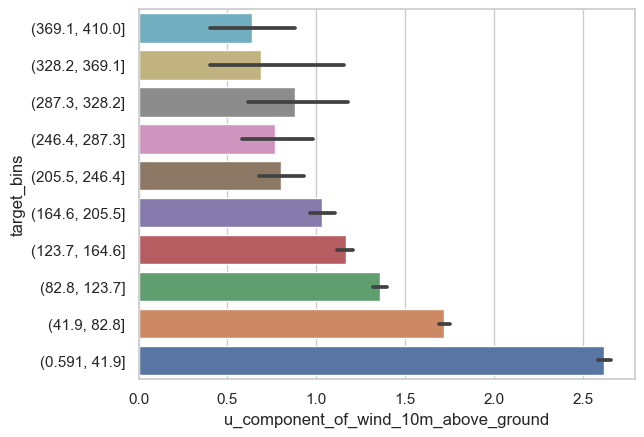

In [92]:
df_1 = df_absolutewind[df_absolutewind['target'] < 458]
df_temp=df_1.copy()
df_temp['target_bins']=pd.cut(df_temp['target'], bins=10)
sns.barplot(df_temp, x='u_component_of_wind_10m_above_ground', y='target_bins').invert_yaxis()


In [95]:
len(df_1)-len(df)
#0.8 * df['target'].max()

-7

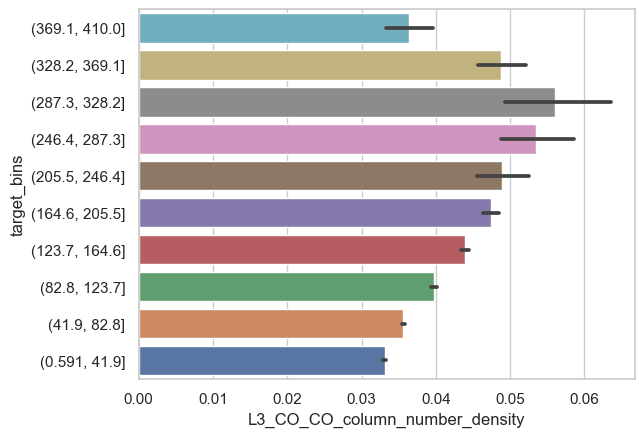

In [97]:
sns.barplot(df_temp, x='L3_CO_CO_column_number_density', y='target_bins').invert_yaxis()

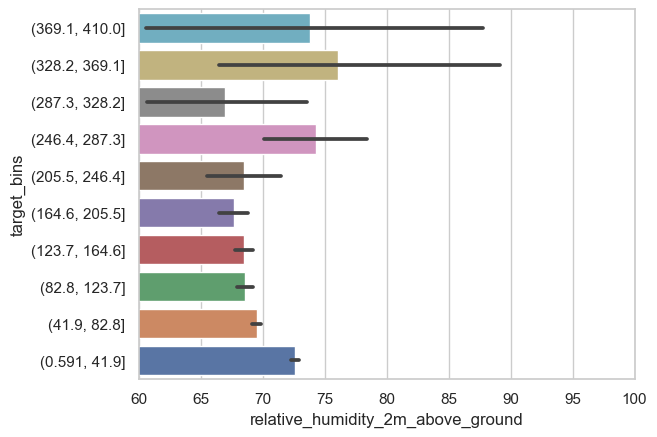

In [101]:
sns.barplot(df_temp, x='relative_humidity_2m_above_ground', y='target_bins').invert_yaxis()
plt.xlim(60, 100)
plt.show()

<Axes: xlabel='relative_humidity_2m_above_ground', ylabel='target'>

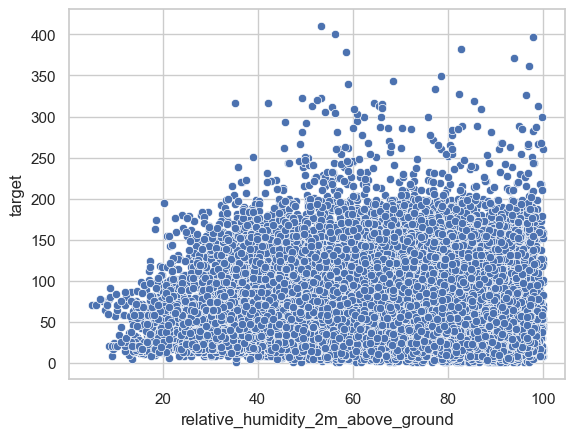

In [100]:
sns.scatterplot(df_temp, x='relative_humidity_2m_above_ground', y='target')

In [ ]:
sns.scatterplot(df_1, x = 'u_component_of_wind_10m_above_ground', y = 'target',
            #scatter_kws = {"color": "blue", "alpha": 0.5},
            #line_kws = {"color": "red"}
           )

In [74]:
df.describe()

,Date,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,L3_NO2_sensor_altitude,L3_NO2_sensor_azimuth_angle,L3_NO2_sensor_zenith_angle,L3_NO2_solar_azimuth_angle,L3_NO2_solar_zenith_angle,L3_NO2_stratospheric_NO2_column_number_density,L3_NO2_tropopause_pressure,L3_NO2_tropospheric_NO2_column_number_density,L3_O3_O3_column_number_density,L3_O3_O3_effective_temperature,L3_O3_cloud_fraction,L3_O3_sensor_azimuth_angle,L3_O3_sensor_zenith_angle,L3_O3_solar_azimuth_angle,L3_O3_solar_zenith_angle,L3_CO_CO_column_number_density,L3_CO_H2O_column_number_density,L3_CO_cloud_height,L3_CO_sensor_altitude,L3_CO_sensor_azimuth_angle,L3_CO_sensor_zenith_angle,L3_CO_solar_azimuth_angle,L3_CO_solar_zenith_angle,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_cloud_fraction,L3_HCHO_sensor_azimuth_angle,L3_HCHO_sensor_zenith_angle,L3_HCHO_solar_azimuth_angle,L3_HCHO_solar_zenith_angle,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_base_height,L3_CLOUD_cloud_base_pressure,L3_CLOUD_cloud_fraction,L3_CLOUD_cloud_optical_depth,L3_CLOUD_cloud_top_height,L3_CLOUD_cloud_top_pressure,L3_CLOUD_sensor_azimuth_angle,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,28368.000000,28368.000000,28368.000000,28368.000000,28368.000000,28367.000000,28367.000000,28367.000000,28367.000000,28367.000000,28367.000000,21888.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,30274.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,2.313200e+04,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,23132.000000,29035.000000,29035.000000,30183.000000,29035.000000,29035.000000,29035.000000,30183.000000,30183.000000,30183.000000,30183.000000,29035.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,30360.000000,23320.000000,23320.000000,23320.000000,23249.000000,23320.000000,23320.000000,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,2020-02-17 11:32:35.807180032,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,0.088486,0.000094,0.000163,-1.093982,0.278011,755880.302425,-10.597347,32.764304,-111.413784,44.432617,0.000032,13342.570998,0.000056,0.139533,222.293932,0.423740,-11.308360,35.727367,-117.739509,47.752032,0.036230,983.448217,1438.006332,821611.615359,-12.590815,35.009648,-124.192829,47.605340,4.320685e-05,0.199705,-14.127472,35.849977,-122.640817,46.802819,0.000088,1.064105,2510.989311,77491.774334,0.433513,18.201564,3286.134009,70799.498221,-11.556380,36.520395,-120.055549,48.584734,0.226843,-1.161213,832553.776969,-11.152614,36.667009,-118.855468

# Data cleaningin and feature engineering

In [5]:
coffee_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28 non-null     int64  
 1   Species                28 non-null     object 
 2   Owner                  28 non-null     object 
 3   Country.of.Origin      28 non-null     object 
 4   Farm.Name              25 non-null     object 
 5   Lot.Number             6 non-null      object 
 6   Mill                   20 non-null     object 
 7   ICO.Number             17 non-null     object 
 8   Company                28 non-null     object 
 9   Altitude               25 non-null     object 
 10  Region                 26 non-null     object 
 11  Producer               26 non-null     object 
 12  Number.of.Bags         28 non-null     int64  
 13  Bag.Weight             28 non-null     object 
 14  In.Country.Partner     28 non-null     object 
 15  Harvest.

In [6]:
#for this exercise we will only deal with numeric variables

X = coffee_features.select_dtypes(['number'])

## Splitting data for testing 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [8]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_train["altitude_mean_log"] = np.log(X_train["altitude_mean_meters"])
X_train.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_train.drop(['Quakers'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 17 to 6
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number.of.Bags        22 non-null     int64  
 1   Harvest.Year          22 non-null     int64  
 2   Fragrance...Aroma     22 non-null     float64
 3   Flavor                22 non-null     float64
 4   Aftertaste            22 non-null     float64
 5   Salt...Acid           22 non-null     float64
 6   Bitter...Sweet        22 non-null     float64
 7   Mouthfeel             22 non-null     float64
 8   Uniform.Cup           22 non-null     float64
 9   Clean.Cup             22 non-null     float64
 10  Balance               22 non-null     float64
 11  Cupper.Points         22 non-null     float64
 12  Total.Cup.Points      22 non-null     float64
 13  Moisture              22 non-null     float64
 14  Category.One.Defects  22 non-null     int64  
 15  Category.Two.Defects  22 

In [10]:
altitude_low_meters_mean = X_train["altitude_low_meters"].mean()
altitude_high_meters_mean = X_train["altitude_high_meters"].mean()
altitude_mean_log_mean = X_train["altitude_mean_log"].mean()

In [11]:
# fillna with mean.. 
X_train["altitude_low_meters"] = X_train["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_train["altitude_high_meters"] = X_train["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_train["altitude_mean_log"] = X_train["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [12]:
print(f"altitude low meters mean is {altitude_low_meters_mean}")
print(f"altitude_high_meters_mean is {altitude_high_meters_mean}")
print(f"altitude_mean_log_mean is {altitude_mean_log_mean}")

altitude low meters mean is 1500.3684210526317
altitude_high_meters_mean is 1505.6315789473683
altitude_mean_log_mean is 7.0571530664031155


## Trainining the model

In [13]:
## in order to exemplify how the predict will work.. we will save the y_train
X_test.to_csv("data/X_test.csv")
y_test.to_csv("data/y_test.csv")

In [15]:
#training the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [17]:
from sklearn.metrics import mean_squared_error
y_train_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)

6.701014816713759e-28


In [18]:
#dropping Quakers column and unnamed
#changing one of the altitude to log and droping the original
X_test["altitude_mean_log"] = np.log(X_test["altitude_mean_meters"])
X_test.drop(['altitude_mean_meters'], axis=1, inplace=True)
X_test.drop(['Quakers'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
# fillna with mean.. 
X_test["altitude_low_meters"] = X_test["altitude_low_meters"].fillna(altitude_low_meters_mean)
X_test["altitude_high_meters"] = X_test["altitude_high_meters"].fillna(altitude_high_meters_mean)
X_test["altitude_mean_log"] = X_test["altitude_mean_log"].fillna(altitude_mean_log_mean)

In [19]:
y_test_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

2.08680004794465e-27
